In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip "/content/drive/MyDrive/Plants Recognition/НИР/Осень 2022/PlantDoc-Dataset200_aug.zip"

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: train/Peach leaf/aug_0_9289.jpg  
  inflating: train/Peach leaf/aug_0_5009.jpg  
  inflating: train/Peach leaf/peach-leaf-isolated-white-background-39426456.jpg  
  inflating: train/Peach leaf/aug_0_6237.jpg  
  inflating: train/Peach leaf/aug_0_6969.jpg  
  inflating: train/Peach leaf/aug_0_7549.jpg  
  inflating: train/Peach leaf/aug_0_7217.jpg  
  inflating: train/Peach leaf/aug_0_6890.jpg  
  inflating: train/Peach leaf/aug_0_2532.jpg  
  inflating: train/Peach leaf/depositphotos_140609182-stock-photo-beauty-peach-with-leaf.jpg  
  inflating: train/Peach leaf/aug_0_873.jpg  
  inflating: train/Peach leaf/aug_0_6483.jpg  
  inflating: train/Peach leaf/aug_0_7216.jpg  
  inflating: train/Peach leaf/aug_0_8429.jpg  
  inflating: train/Peach leaf/aug_0_3423.jpg  
  inflating: train/Peach leaf/aug_0_9932.jpg  
  inflating: train/Peach leaf/image_original.jpeg?1473123508.jpg  
  inflating: train/Peach leaf/p

In [4]:
base_dir = '/content'
#!find $dir_base -type d -print

In [5]:
dir_train=os.path.join(base_dir, 'train')
dir_test=os.path.join(base_dir, 'test')

Количество изображений каждого класса в тренировочной и тестовой выборках

In [6]:
for plant_train in os.listdir(dir_train):
  i=0
  for plant_test in os.listdir(dir_test):
    i+=1
    if(plant_train==plant_test):
      print(plant_train)
      print('  train:',len(os.listdir(os.path.join(dir_train, plant_train))))
      print('  test:',len(os.listdir(os.path.join(dir_test, plant_test))))
      break
    else:
      if i==len(os.listdir(dir_test)):
        print('НЕТ в test',plant_train)

Tomato leaf bacterial spot
  train: 296
  test: 9
Strawberry leaf
  train: 255
  test: 8
Corn Gray leaf spot
  train: 242
  test: 4
Tomato leaf mosaic virus
  train: 236
  test: 10
Tomato Septoria leaf spot
  train: 258
  test: 11
Tomato leaf yellow virus
  train: 261
  test: 6
Blueberry leaf
  train: 292
  test: 11
Squash Powdery mildew leaf
  train: 276
  test: 6
Soyabean leaf
  train: 244
  test: 8
Raspberry leaf
  train: 284
  test: 7
Bell_pepper leaf
  train: 248
  test: 8
Tomato leaf
  train: 245
  test: 8
Tomato leaf late blight
  train: 297
  test: 10
Potato leaf early blight
  train: 290
  test: 8
Apple leaf
  train: 257
  test: 9
Corn rust leaf
  train: 291
  test: 10
Apple Scab Leaf
  train: 257
  test: 10
Cherry leaf
  train: 235
  test: 10
Bell_pepper leaf spot
  train: 242
  test: 9
Corn leaf blight
  train: 220
  test: 12
Peach leaf
  train: 294
  test: 9
grape leaf black rot
  train: 247
  test: 8
Tomato mold leaf
  train: 255
  test: 6
Apple rust leaf
  train: 258
  te

Удаление класса Tomato two spotted spider mites leaf, так как он не содержится в тестовой выборке, а в обучающей имеет только 2 изображения

In [7]:
batch_size = 32
#batch_size = 8
train_generator = tf.keras.utils.image_dataset_from_directory(
    directory=dir_train,
    image_size=(224,224),
    color_mode="rgb",
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    shuffle=True,
    seed=42
)
valid_generator = tf.keras.utils.image_dataset_from_directory(
    directory=dir_train,
    image_size=(224, 224),
    color_mode="rgb",
    validation_split=0.2,
    batch_size=batch_size,
    subset='validation',
    shuffle=True,
    seed=42
)
test_generator = tf.keras.utils.image_dataset_from_directory(
    directory=dir_test,
    image_size=(224,224),
    color_mode="rgb",
    batch_size=1,
    shuffle=False,
    seed=42
)

Found 7029 files belonging to 27 classes.
Using 5624 files for training.
Found 7029 files belonging to 27 classes.
Using 1405 files for validation.
Found 236 files belonging to 27 classes.


In [8]:
class_names = train_generator.class_names
print(class_names)

['Apple Scab Leaf', 'Apple leaf', 'Apple rust leaf', 'Bell_pepper leaf', 'Bell_pepper leaf spot', 'Blueberry leaf', 'Cherry leaf', 'Corn Gray leaf spot', 'Corn leaf blight', 'Corn rust leaf', 'Peach leaf', 'Potato leaf early blight', 'Potato leaf late blight', 'Raspberry leaf', 'Soyabean leaf', 'Squash Powdery mildew leaf', 'Strawberry leaf', 'Tomato Early blight leaf', 'Tomato Septoria leaf spot', 'Tomato leaf', 'Tomato leaf bacterial spot', 'Tomato leaf late blight', 'Tomato leaf mosaic virus', 'Tomato leaf yellow virus', 'Tomato mold leaf', 'grape leaf', 'grape leaf black rot']


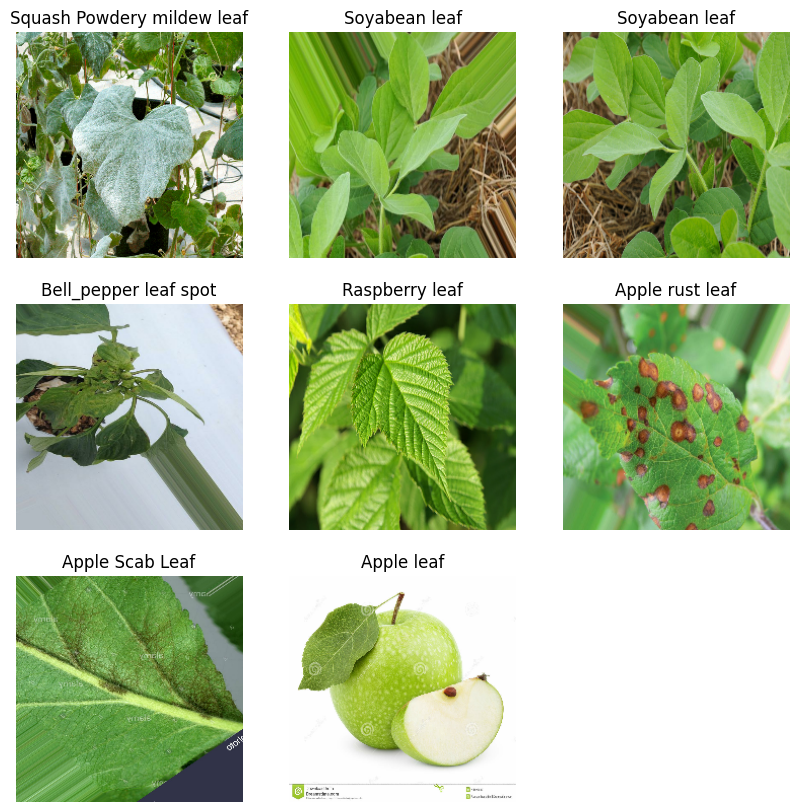

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_generator.take(1):
  for i in range(8):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_generator = train_generator.cache().prefetch(buffer_size=AUTOTUNE)
valid_generator = valid_generator.cache().prefetch(buffer_size=AUTOTUNE)
test_generator = test_generator.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D


base_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False)


x = base_model.output
x = GlobalAveragePooling2D()(x)


x = Dropout(0.2)(x)
x = Flatten()(x)


x = Dense(1024, activation='relu')(x)
predictions = Dense(27, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)


#for layer in base_model.layers:
#    layer.trainable = False

16705208/16705208 [==============================] - 0s 0us/step


In [12]:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activation
5

In [13]:
for layer in model.layers[:184]:
   layer.trainable = False
for layer in model.layers[184:]:
   layer.trainable = True


model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [14]:
from time import time
import os
import psutil
 
# inner psutil function
def process_memory():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss

In [15]:
t0 = time()
mem_before = process_memory()

history = model.fit_generator(train_generator,
                    validation_data = valid_generator,
                    epochs=5)
mem_after = process_memory()
print(mem_after - mem_before)
t1 = time()
vtime = t1 - t0
print(f'time: {vtime} sec %%')

Epoch 1/5


<ipython-input-15-c64a22516fa0>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,
/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


176/176 [==============================] - 790s 4s/step - loss: 1.2709 - accuracy: 0.6129 - val_loss: 0.7775 - val_accuracy: 0.7623
Epoch 2/5
176/176 [==============================] - 727s 4s/step - loss: 0.3824 - accuracy: 0.8842 - val_loss: 0.7171 - val_accuracy: 0.7943
Epoch 3/5
176/176 [==============================] - 756s 4s/step - loss: 0.2168 - accuracy: 0.9308 - val_loss: 0.7140 - val_accuracy: 0.8441
Epoch 4/5
176/176 [==============================] - 756s 4s/step - loss: 0.1846 - accuracy: 0.9411 - val_loss: 0.8853 - val_accuracy: 0.8206
Epoch 5/5
176/176 [==============================] - 754s 4s/step - loss: 0.1840 - accuracy: 0.9413 - val_loss: 0.8824 - val_accuracy: 0.8192
5301334016
time: 3869.9917900562286 sec %%


In [16]:
#model.summary()

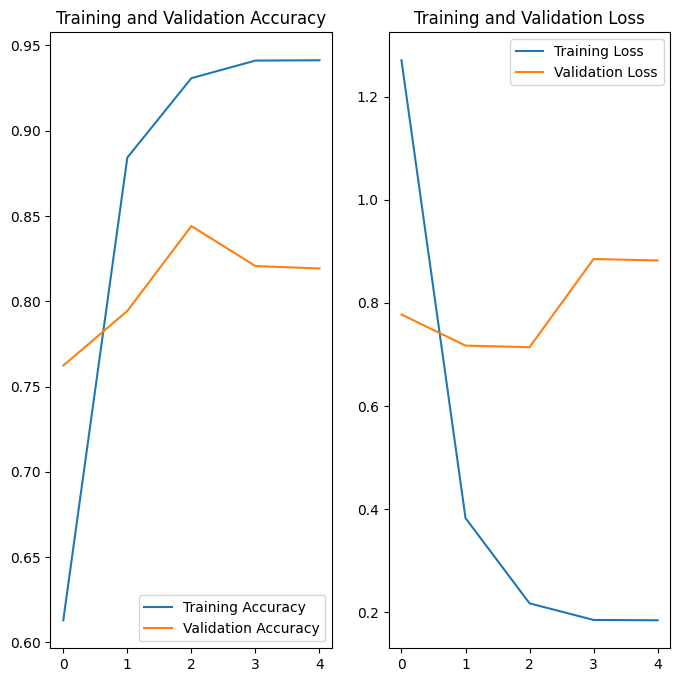

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

236/236 [==============================] - 26s 101ms/step
This image most likely belongs to Apple Scab Leaf with a 5.03 percent confidence.


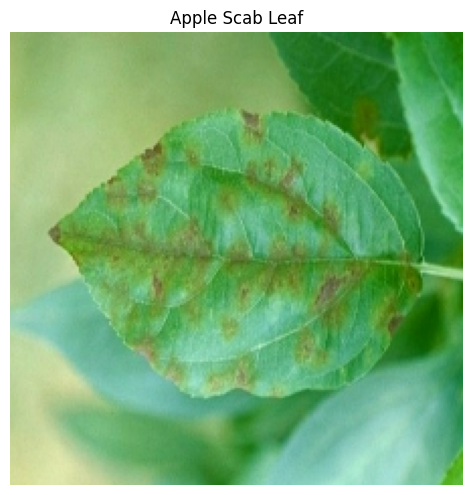

In [18]:
import numpy as np

test_predictions = model.predict(test_generator)
score = tf.nn.softmax(test_predictions[0])

plt.figure(figsize=(20, 20))
for images, labels in test_generator.take(1):
  for i in range(1):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [19]:
from tensorflow import keras,lite


keras_file = "linear.h5"
tf.keras.models.save_model(model,keras_file)
converter = lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()

open("linear.tflite","wb").write(tfmodel)

TypeError: ignored

In [20]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(test_generator, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
236/236 [==============================] - 20s 83ms/step - loss: 2.4435 - accuracy: 0.5636
test loss, test acc: [2.4434750080108643, 0.5635592937469482]
